In [1]:
import data_importer
import model as md
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inputs = tf.keras.Input(shape=(480,640,3))
model = md.deep_lab_v3(inputs=inputs)

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 480, 640, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 320, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 240, 320, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 240, 320, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [4]:
model.compile(optimizer=tf.train.RMSPropOptimizer(0.0001),
              loss='categorical_crossentropy',#loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# estimator = tf.keras.estimator.model_to_estimator(model, model_dir='C:/Users/mamin/GitHub/DeepLabV3plus/estimator')

## Imporing Dataset

In [ ]:
# import data_importer
# data = data_importer.SynthiaSf('D:/Library/Datasets/SYNTHIA-SF/',label_type='segmentation',shuffle=True)
# a = iter(data)

In [ ]:
# x=next(a)
# plt.imshow(x[1][0],cmap='nipy_spectral')

In [5]:
batch_size=1
NYU_Depth_Dataset_V2_address = "D:\\Library\\Datasets\\nyu depth v2\\nyu_depth_v2_labeled.mat"
def input_set():
    dataset = tf.data.Dataset.from_generator(data_importer.NYU, 
                                             (tf.float32, tf.float32), 
                                             (tf.TensorShape([batch_size,480, 640, 3]), 
                                              tf.TensorShape([batch_size,480, 640])),
                                            (NYU_Depth_Dataset_V2_address,batch_size,True))
    return dataset

In [6]:
nyu = data_importer.NYU(NYU_Depth_Dataset_V2_address,batch_size=batch_size, repeater=True,label_type='segmentation')

AttributeError: 'str' object has no attribute 'decode'

In [4]:
n = iter(nyu)

In [5]:
a,b=next(n)
# type(b)

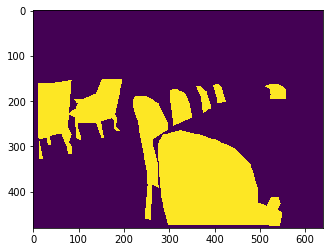

In [6]:
plt.imshow(b[0, :, :, 5])

In [ ]:
# estimator.train(
#       input_fn=input_set,
#       steps=3000)

In [53]:
# model.fit_generator(nyu,steps_per_epoch=1448)

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs', write_images=True)
]
model.fit_generator(nyu, steps_per_epoch=1448, epochs=1, callbacks=callbacks)

Epoch 1/1
1448/1448 [==============================] - 3013s 2s/step - loss: 2.0746 - acc: 0.3695


In [54]:
n = iter(nyu)

In [55]:
a,b=next(n)

In [60]:
model.evaluate(a,b)

1/1 [==============================] - 1s 658ms/step


[8.929987416195218e-08, 0.5485774874687195]

In [61]:
c=model.predict(a,steps=1)

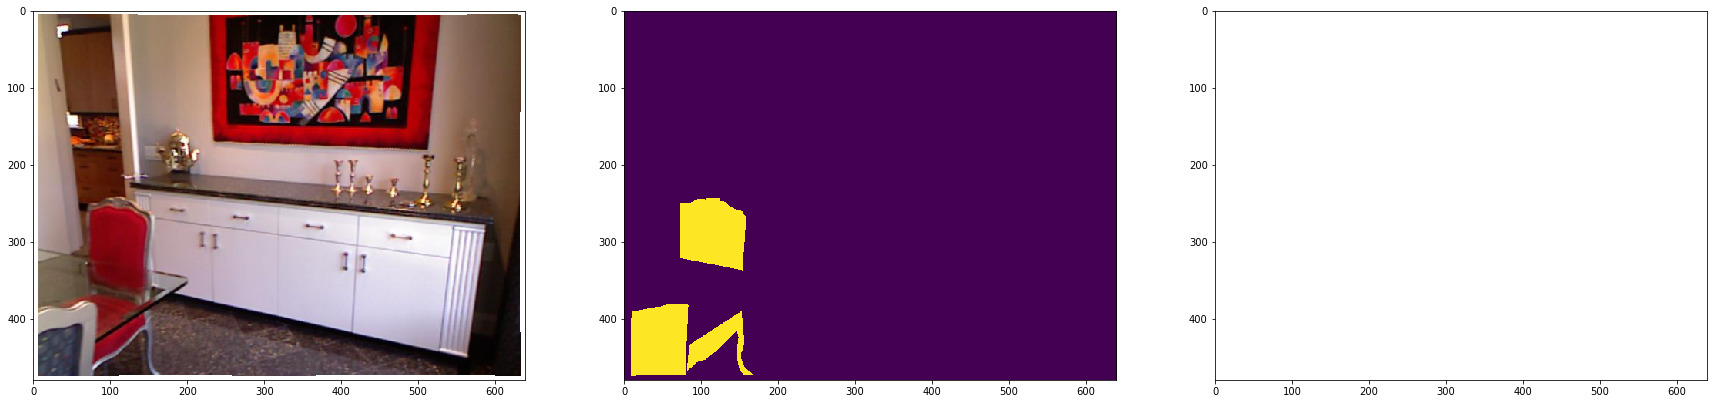

In [62]:
i=5
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(a[0,:,:])
plt.subplot(1,3,2)
plt.imshow(b[0,:,:,i])
plt.subplot(1,3,3)
plt.imshow(c[0,:,:,i])

In [59]:
c

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan